## MA515 Project
## Pranjali Bajpai 2018EEB1243

## Problem Statement
    Do exploratory data analysis on the data. Use logistic regression and LDA to predict whether a customer will buy Caravan Insurance policy. Compare the findings from different methods
## Dataset 
    Caravan.csv

In [1894]:
# Import libraries
import pandas as pd
import numpy as np

# Read the dataset
data = pd.read_csv('Caravan.csv')

# Set the max_column and max_row so that all columns and relevant number of rows are visible
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

## Dataset Exploration

In [1895]:
# Shape of data
data.shape

(5822, 87)

In [1896]:
# View first 5 rows of the data
data.head()

,Unnamed: 0,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWAPART,PWABEDR,PWALAND,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


In [1897]:
# Apply the labels to the columns to get better understanding of data
# Labels taken from here: https://www.kaggle.com/uciml/caravan-insurance-challenge (Data heading under Description)
labels = ['SerialNumber', 'CustomerSubtype', 'NumberOfHouses1', 'AvgSizeHousehold1', 'AvgAge', 'CustomerMainType', 'RomanCatholic', 'Protestant', 'OtherReligion', 'NoReligion', 'Married', 'LivingTogether', 'OtherRelation', 'Singles', 'HouseholdWithoutChildren', 'HouseholdWithChildren', 'HighLevelEducation', 'MediumLevelEducation', 'LowerLevelEducation', 'HighStatus', 'Entrepreneur', 'Farmer', 'MiddleManagement', 'SkilledLabourers', 'UnskilledLabourers', 'SocialClassA', 'SocialClassB1', 'SocialClassB2', 'SocialClassC', 'SocialClassD', 'RentedHouse', 'HomeOwners', '1Car', '2Cars', 'NoCar', 'NationalHealthService', 'PrivateHealthInsurance', 'Income<30.000', 'Income30-45.000', 'Income45-75.000', 'Income75-122.000', 'Income>123.000', 'AverageIncome', 'PurchasingPowerClass', 'ContributionPrivateThirdPartyInsurance', 'ContributionThirdPartyInsurance(firms)', 'ContributionThirdPartyInsurane(agriculture)', 'ContributionCarPolicies', 'ContributionDeliveryVanPolicies', 'ContributionMotorcycle/scooterPolicies', 'ContributionLorryPolicies', 'ContributionTrailerPolicies', 'ContributionTractorPolicies', 'ContributionAgriculturalMachinesPolicies', 'ContributionMopedPolicies', 'ContributionLifeInsurances', 'ContributionPrivateAccidentInsurancePolicies', 'ContributionFamilyAccidentsInsurancePolicies', 'ContributionDisabilityInsurancePolicies', 'ContributionFirePolicies', 'ContributionSurfboardPolicies', 'ContributionBoatPolicies', 'ContributionBicyclePolicies', 'ContributionPropertyInsurancePolicies', 'ContributionSocialSecurityInsurancePolicies', 'NumberOfPrivateThirdPartyInsurance1-12', 'NumberOfThirdPartyInsurance(firms)', 'NumberOfThirdPartyInsurane(agriculture)', 'NumberOfCarPolicies', 'NumberOfDeliveryVanPolicies', 'NumberOfMotorcycle/scooterPolicies', 'NumberOfLorryPolicies', 'NumberOfTrailerPolicies', 'NumberOfTractorPolicies', 'NumberOfAgriculturalMachinesPolicies', 'NumberOfMopedPolicies', 'NumberOfLifeInsurances', 'NumberOfPrivateAccidentInsurancePolicies', 'NumberOfFamilyAccidentsInsurancePolicies', 'NumberOfDisabilityInsurancePolicies', 'NumberOfFirePolicies', 'NumberOfSurfboardPolicies', 'NumberOfBoatPolicies', 'NumberOfBicyclePolicies', 'NumberOfPropertyInsurancePolicies', 'NumberOfSocialSecurityInsurancePolicies', 'Purchase']
# Set the labels
caravan_data = data.set_axis(labels, axis=1, inplace=False)

Column codes beginning with M (MOSTYPE CustomerSubtype to MKOOPKLA PurchasingPowerClass) refer to demographic statistics of the postal code, while Column codes beginning with P and A refer to product ownership and insurance statistics in the postal code.

In [1898]:
# View first 5 rows of the data
caravan_data.head()

,SerialNumber,CustomerSubtype,NumberOfHouses1,AvgSizeHousehold1,AvgAge,CustomerMainType,RomanCatholic,Protestant,OtherReligion,NoReligion,Married,LivingTogether,OtherRelation,Singles,HouseholdWithoutChildren,HouseholdWithChildren,HighLevelEducation,MediumLevelEducation,LowerLevelEducation,HighStatus,Entrepreneur,Farmer,MiddleManagement,SkilledLabourers,UnskilledLabourers,SocialClassA,SocialClassB1,SocialClassB2,SocialClassC,SocialClassD,RentedHouse,HomeOwners,1Car,2Cars,NoCar,NationalHealthService,PrivateHealthInsurance,Income<30.000,Income30-45.000,Income45-75.000,Income75-122.000,Income>123.000,AverageIncome,PurchasingPowerClass,ContributionPrivateThirdPartyInsurance,ContributionThirdPartyInsurance(firms),ContributionThirdPartyInsurane(agriculture),ContributionCarPolicies,ContributionDeliveryVanPolicies,ContributionMotorcycle/scooterPolicies,ContributionLorryPolicies,ContributionTrailerPolicies,ContributionTractorPolicies,ContributionAgriculturalMachinesPolicies,ContributionMopedPolicies,ContributionLifeInsurances,ContributionPrivateAccidentInsurancePolicies,ContributionFamilyAccidentsInsurancePolicies,ContributionDisabilityInsurancePolicies,ContributionFirePolicies,ContributionSurfboardPolicies,ContributionBoatPolicies,ContributionBicyclePolicies,ContributionPropertyInsurancePolicies,ContributionSocialSecurityInsurancePolicies,NumberOfPrivateThirdPartyInsurance1-12,NumberOfThirdPartyInsurance(firms),NumberOfThirdPartyInsurane(agriculture),NumberOfCarPolicies,NumberOfDeliveryVanPolicies,NumberOfMotorcycle/scooterPolicies,NumberOfLorryPolicies,NumberOfTrailerPolicies,NumberOfTractorPolicies,NumberOfAgriculturalMachinesPolicies,NumberOfMopedPolicies,NumberOfLifeInsurances,NumberOfPrivateAccidentInsurancePolicies,NumberOfFamilyAccidentsInsurancePolicies,NumberOfDisabilityInsurancePolicies,NumberOfFirePolicies,NumberOfSurfboardPolicies,NumberOfBoatPolicies,NumberOfBicyclePolicies,NumberOfPropertyInsurancePolicies,NumberOfSocialSecurityInsurancePolicies,Purchase
0,1,33,1,3,2,8,0,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
1,2,37,1,2,2,8,1,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
2,3,37,1,2,2,8,0,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,2,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
3,4,9,1,3,3,3,2,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No
4,5,40,1,4,2,10,1,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,No


In [1899]:
# Since SerialNumber is of no use
caravan_data = caravan_data.drop(['SerialNumber'], axis=1)

In [1900]:
caravan_data.shape

(5822, 86)

The dataset consists of 5822 data points
It has total 86 columns out of which the last column corresponds to output whether customer will purchase Caravan Insurance policy or not

In [1901]:
# See statistic of data (count, min, max and avg value of each column)
caravan_data.describe()

,CustomerSubtype,NumberOfHouses1,AvgSizeHousehold1,AvgAge,CustomerMainType,RomanCatholic,Protestant,OtherReligion,NoReligion,Married,LivingTogether,OtherRelation,Singles,HouseholdWithoutChildren,HouseholdWithChildren,HighLevelEducation,MediumLevelEducation,LowerLevelEducation,HighStatus,Entrepreneur,Farmer,MiddleManagement,SkilledLabourers,UnskilledLabourers,SocialClassA,SocialClassB1,SocialClassB2,SocialClassC,SocialClassD,RentedHouse,HomeOwners,1Car,2Cars,NoCar,NationalHealthService,PrivateHealthInsurance,Income<30.000,Income30-45.000,Income45-75.000,Income75-122.000,Income>123.000,AverageIncome,PurchasingPowerClass,ContributionPrivateThirdPartyInsurance,ContributionThirdPartyInsurance(firms),ContributionThirdPartyInsurane(agriculture),ContributionCarPolicies,ContributionDeliveryVanPolicies,ContributionMotorcycle/scooterPolicies,ContributionLorryPolicies,ContributionTrailerPolicies,ContributionTractorPolicies,ContributionAgriculturalMachinesPolicies,ContributionMopedPolicies,ContributionLifeInsurances,ContributionPrivateAccidentInsurancePolicies,ContributionFamilyAccidentsInsurancePolicies,ContributionDisabilityInsurancePolicies,ContributionFirePolicies,ContributionSurfboardPolicies,ContributionBoatPolicies,ContributionBicyclePolicies,ContributionPropertyInsurancePolicies,ContributionSocialSecurityInsurancePolicies,NumberOfPrivateThirdPartyInsurance1-12,NumberOfThirdPartyInsurance(firms),NumberOfThirdPartyInsurane(agriculture),NumberOfCarPolicies,NumberOfDeliveryVanPolicies,NumberOfMotorcycle/scooterPolicies,NumberOfLorryPolicies,NumberOfTrailerPolicies,NumberOfTractorPolicies,NumberOfAgriculturalMachinesPolicies,NumberOfMopedPolicies,NumberOfLifeInsurances,NumberOfPrivateAccidentInsurancePolicies,NumberOfFamilyAccidentsInsurancePolicies,NumberOfDisabilityInsurancePolicies,NumberOfFirePolicies,NumberOfSurfboardPolicies,NumberOfBoatPolicies,NumberOfBicyclePolicies,NumberOfPropertyInsurancePolicies,NumberOfSocialSecurityInsurancePolicies
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.00000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,0.883545,2.290450,1.887667,3.230333,4.300240,1.461010,3.351254,4.572484,1.895053,0.397973,0.522329,2.899004,2.219856,2.306424,1.620749,1.606836,2.202508,3.758674,1.067331,4.236860,4.771728,6.040364,1.316386,1.959464,6.277053,2.728959,2.573686,3.536070,2.731364,0.796118,0.202679,3.784438,4.236345,0.771213,0.040021,0.071625,2.970457,0.048265,0.175369,0.009447,0.020955,0.092580,0.013054,0.215046,0.194778,0.013741,0.015287,0.023531,1.827722,0.000859,0.018894,0.025249,0.01563,0.047578,0.402954,0.014772,0.020611,0.562178,0.010477,0.041051,0.002233,0.012539,0.033665,0.006183,0.070423,0.076606,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,0.965924,1.722645,1.799928,1.619973,2.005283,1.622967,1.761052,2.298125,1.798321,0.775073,1.056926,1.839675,1.730840,1.692843,1.722882,1.3

### About Various Columns
- The CustomerSubtype is a categorical column with value in range [1,41] and with following meaning
    - 1: High Income, expensive child
    - 2: Very Important Provincials
    - 3: High status seniors
    - 4: Affluent senior apartments
    - 5: Mixed seniors
    - 6: Career and childcare
    - 7: Dinki's (double income no kids)
    - 8: Middle class families
    - 9: Modern, complete families
    - 10: Stable family
    - 11: Family starters
    - 12: Affluent young families
    - 13: Young all american family
    - 14: Junior cosmopolitan
    - 15: Senior cosmopolitans
    - 16: Students in apartments
    - 17: Fresh masters in the city
    - 18: Single youth
    - 19: Suburban youth
    - 20: Etnically diverse
    - 21: Young urban have-nots
    - 22: Mixed apartment dwellers
    - 23: Young and rising
    - 24: Young, low educated
    - 25: Young seniors in the city
    - 26: Own home elderly
    - 27: Seniors in apartments
    - 28: Residential elderly
    - 29: Porchless seniors: no front yard
    - 30: Religious elderly singles
    - 31: Low income catholics
    - 32: Mixed seniors
    - 33: Lower class large families
    - 34: Large family, employed child
    - 35: Village families
    - 36: Couples with teens 'Married with children'
    - 37: Mixed small town dwellers
    - 38: Traditional families
    - 39: Large religous families
    - 40: Large family farms
    - 41: Mixed rurals
    
- The AvgAge is a categorical column with value in range [1, 6] and with following meaning
    - 1: 20-30 years
    - 2: 30-40 years
    - 3: 40-50 years
    - 4: 50-60 years
    - 5: 60-70 years
    - 6: 70-80 years
    
- The CustomerMainType is a categorical column with value in range [1, 10] and with following meaning
    - 1: Successful hedonists
    - 2: Driven Growers
    - 3: Average Family
    - 4: Career Loners
    - 5: Living well
    - 6: Cruising Seniors
    - 7: Retired and Religeous
    - 8: Family with grown ups
    - 9: Conservative families
    - 10: Farmers
- Next from RomanCatholic to PurchasingPowerClass columns represent Percentages in each group, per postal code with value in range [0, 9] and with following meaning
    - 0: 0%
    - 1: 1 - 10%
    - 2: 11 - 23%
    - 3: 24 - 36%
    - 4: 37 - 49%
    - 5: 50 - 62%
    - 6: 63 - 75%
    - 7: 76 - 88%
    - 8: 89 - 99%
    - 9: 100%
- Next from ContributionPrivateThirdPartyInsurance to NumberOfSocialSecurityInsurancePolicies columns represent Total number of variable in postal code with value in range [0, 9] and with following meaning
    - 0: 0
    - 1: 1 - 49
    - 2: 50 - 99
    - 3: 100 - 199
    - 4: 200 - 499
    - 5: 500 - 999
    - 6: 1000 - 4999
    - 7: 5000 - 9999
    - 8: 10,000 - 19,999
    - 9: >= 20,000
- Reference: https://www.kaggle.com/uciml/caravan-insurance-challenge (Data heading under Description)

In [1902]:
# Get data info
caravan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   CustomerSubtype                               5822 non-null   int64 
 1   NumberOfHouses1                               5822 non-null   int64 
 2   AvgSizeHousehold1                             5822 non-null   int64 
 3   AvgAge                                        5822 non-null   int64 
 4   CustomerMainType                              5822 non-null   int64 
 5   RomanCatholic                                 5822 non-null   int64 
 6   Protestant                                    5822 non-null   int64 
 7   OtherReligion                                 5822 non-null   int64 
 8   NoReligion                                    5822 non-null   int64 
 9   Married                                       5822 non-null   int64 
 10  

In [1903]:
# Count Null values(if any)
caravan_data.isnull().sum(axis=0)

CustomerSubtype                                 0
NumberOfHouses1                                 0
AvgSizeHousehold1                               0
AvgAge                                          0
CustomerMainType                                0
RomanCatholic                                   0
Protestant                                      0
OtherReligion                                   0
NoReligion                                      0
Married                                         0
LivingTogether                                  0
OtherRelation                                   0
Singles                                         0
HouseholdWithoutChildren                        0
HouseholdWithChildren                           0
HighLevelEducation                              0
MediumLevelEducation                            0
LowerLevelEducation                             0
HighStatus                                      0
Entrepreneur                                    0


- There are no Null values in any column of the dataset

In [1904]:
# Count NA values(if any)
caravan_data.isna().sum(axis=0)

CustomerSubtype                                 0
NumberOfHouses1                                 0
AvgSizeHousehold1                               0
AvgAge                                          0
CustomerMainType                                0
RomanCatholic                                   0
Protestant                                      0
OtherReligion                                   0
NoReligion                                      0
Married                                         0
LivingTogether                                  0
OtherRelation                                   0
Singles                                         0
HouseholdWithoutChildren                        0
HouseholdWithChildren                           0
HighLevelEducation                              0
MediumLevelEducation                            0
LowerLevelEducation                             0
HighStatus                                      0
Entrepreneur                                    0


- There are no NA values in any column of the dataset

To conclude the dataset does not consist of any missing value

<AxesSubplot:>

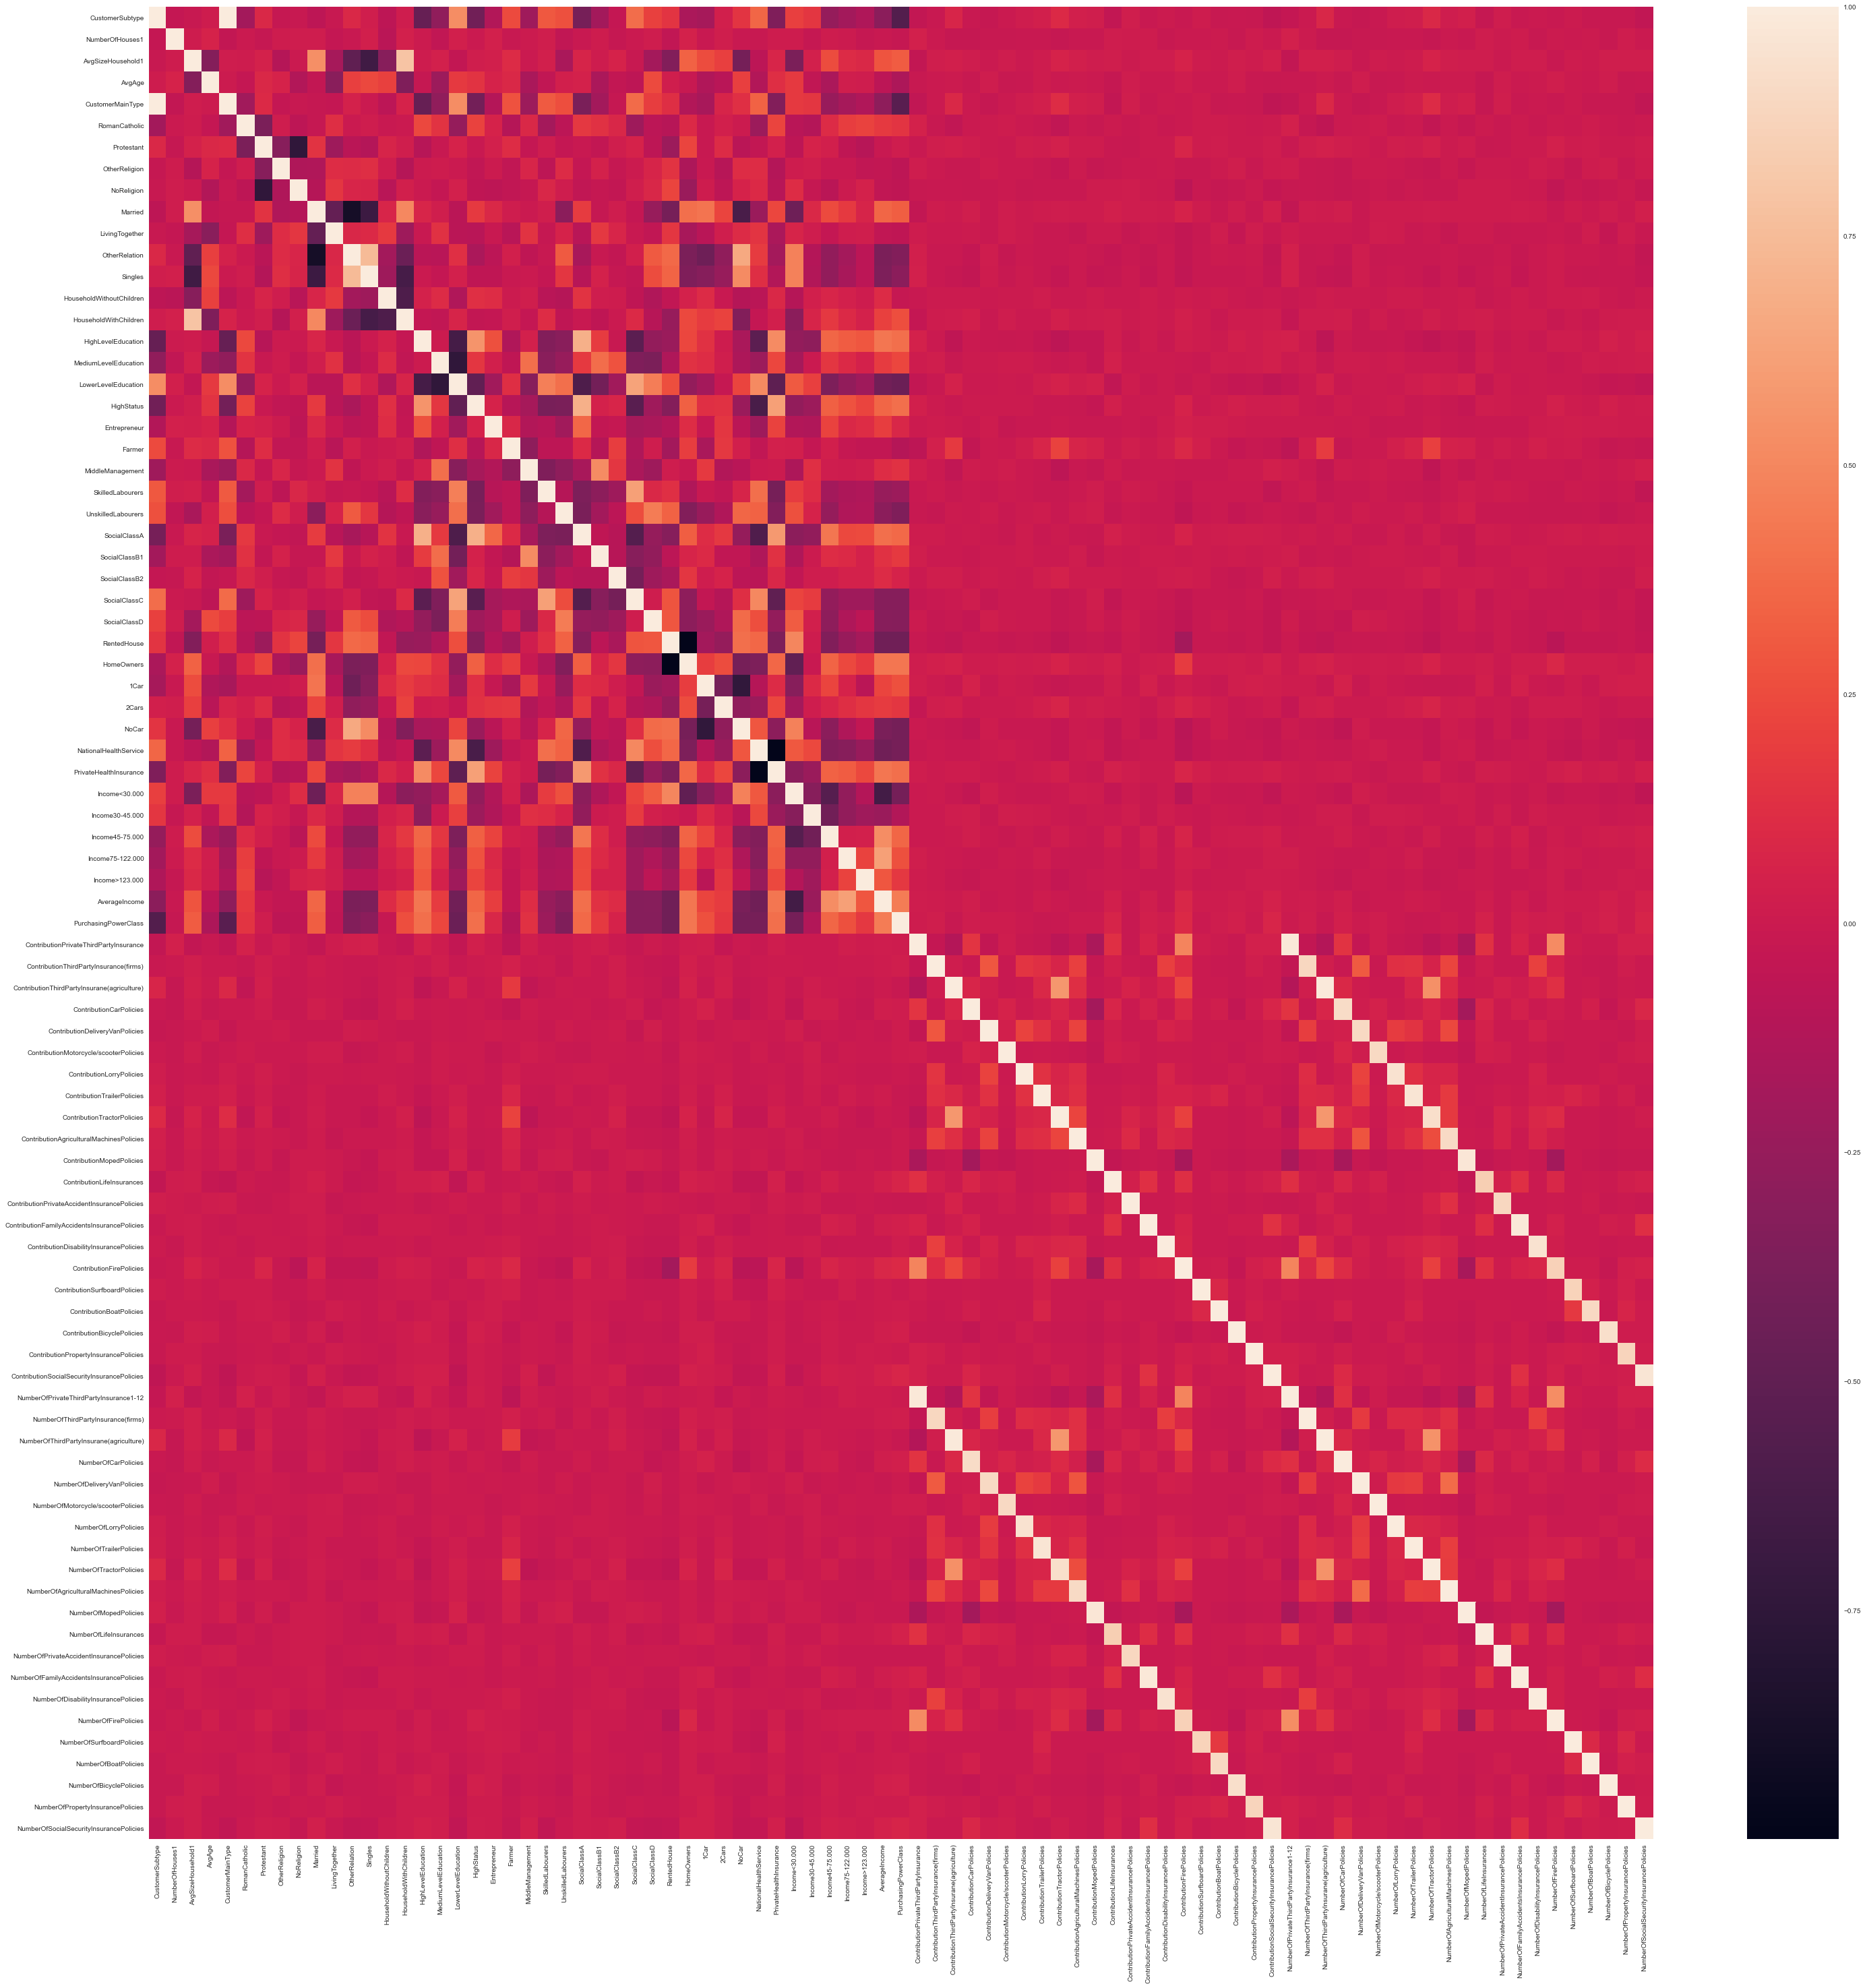

In [1905]:
# Plot correlation
import seaborn as sns
plt.figure(figsize = (50, 50))
sns.heatmap(caravan_data.corr())

- Since there are large number of predictor variable(85), the relation is not visible clearly
- But we can clearly see there is clear distinction in the two sets of variables in the dataset, i.e. one whose code starts with M which represents the demographic statistics of the postal code, and whose code starts with P and A that refer to product ownership and insurance statistics in the postal code.
- Now let us look at the demographic statistics correlation seperately

<AxesSubplot:>

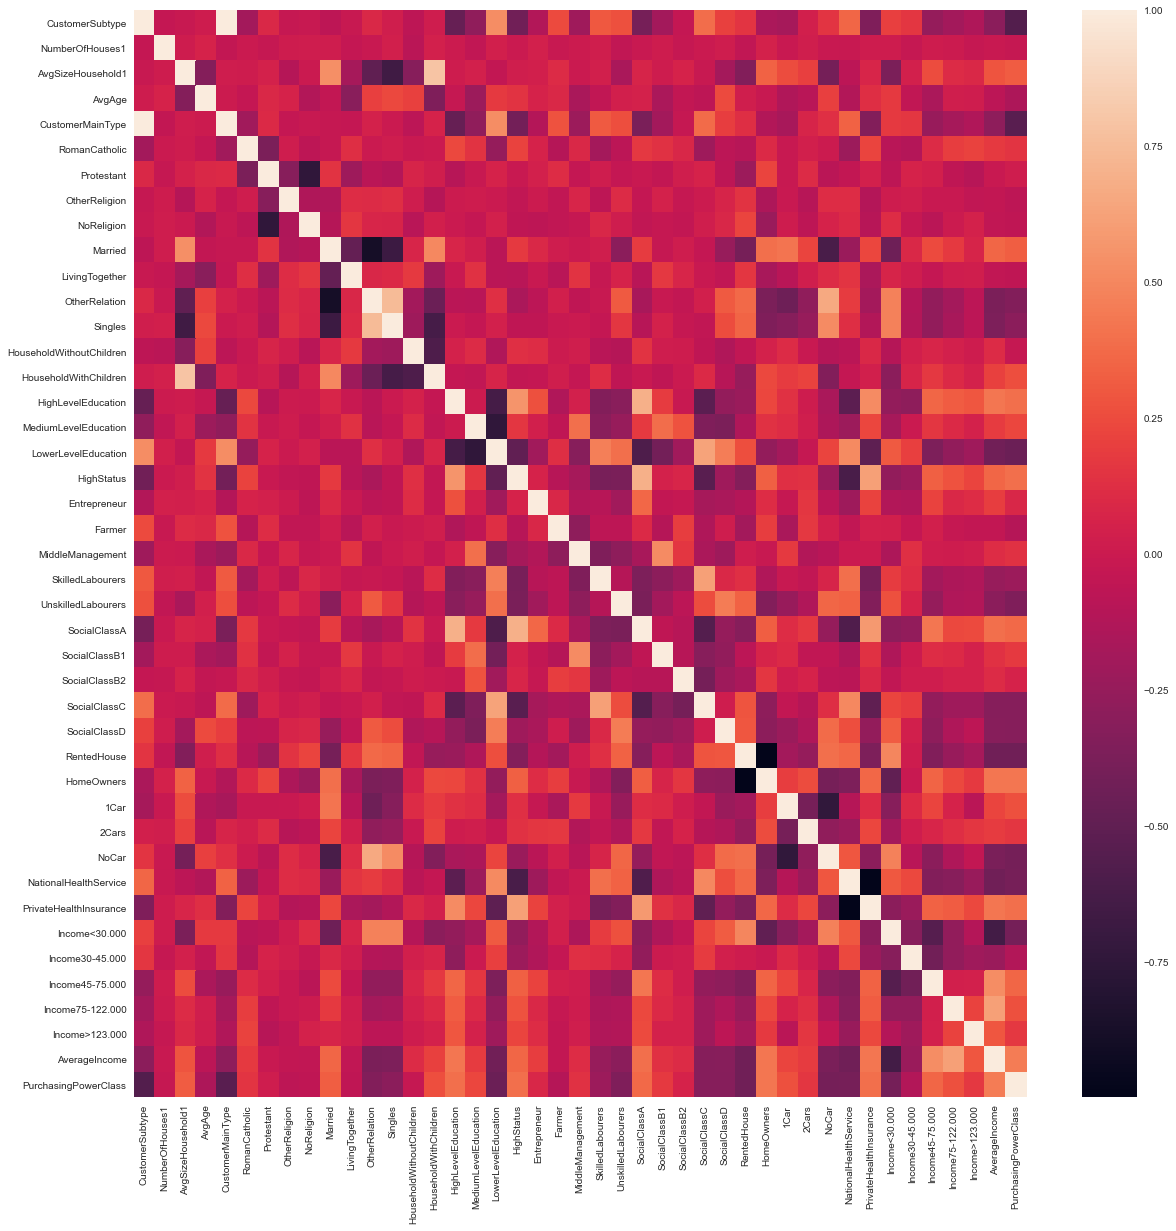

In [1906]:
plt.figure(figsize = (20, 20))
sns.heatmap(caravan_data.iloc[:, :43].corr())

### Observations from Heatmap
    - There is high positive correlation between Customer Sub Type and Customer Main Type
    - Average Size Household is positively correlated with Household With Children
    - Married and No Car are negatively correlated
    - National Health Service and Private Health Insurance are negatively correlated
    - Social Class A is positively correlated with High level Education
    - Social Class A is positively correlated with  Private Health Insurance
    - Social Class A is positively correlated with High Status
    - Social Class C is positively correlated with Lower Level Education
    - Social Class C is positively correlated with  Private HEalth Insurance
    - National Health Service and Social Class A are negatively correlated
    - Skilled Laboureres and Social Class C are highly positively correlated

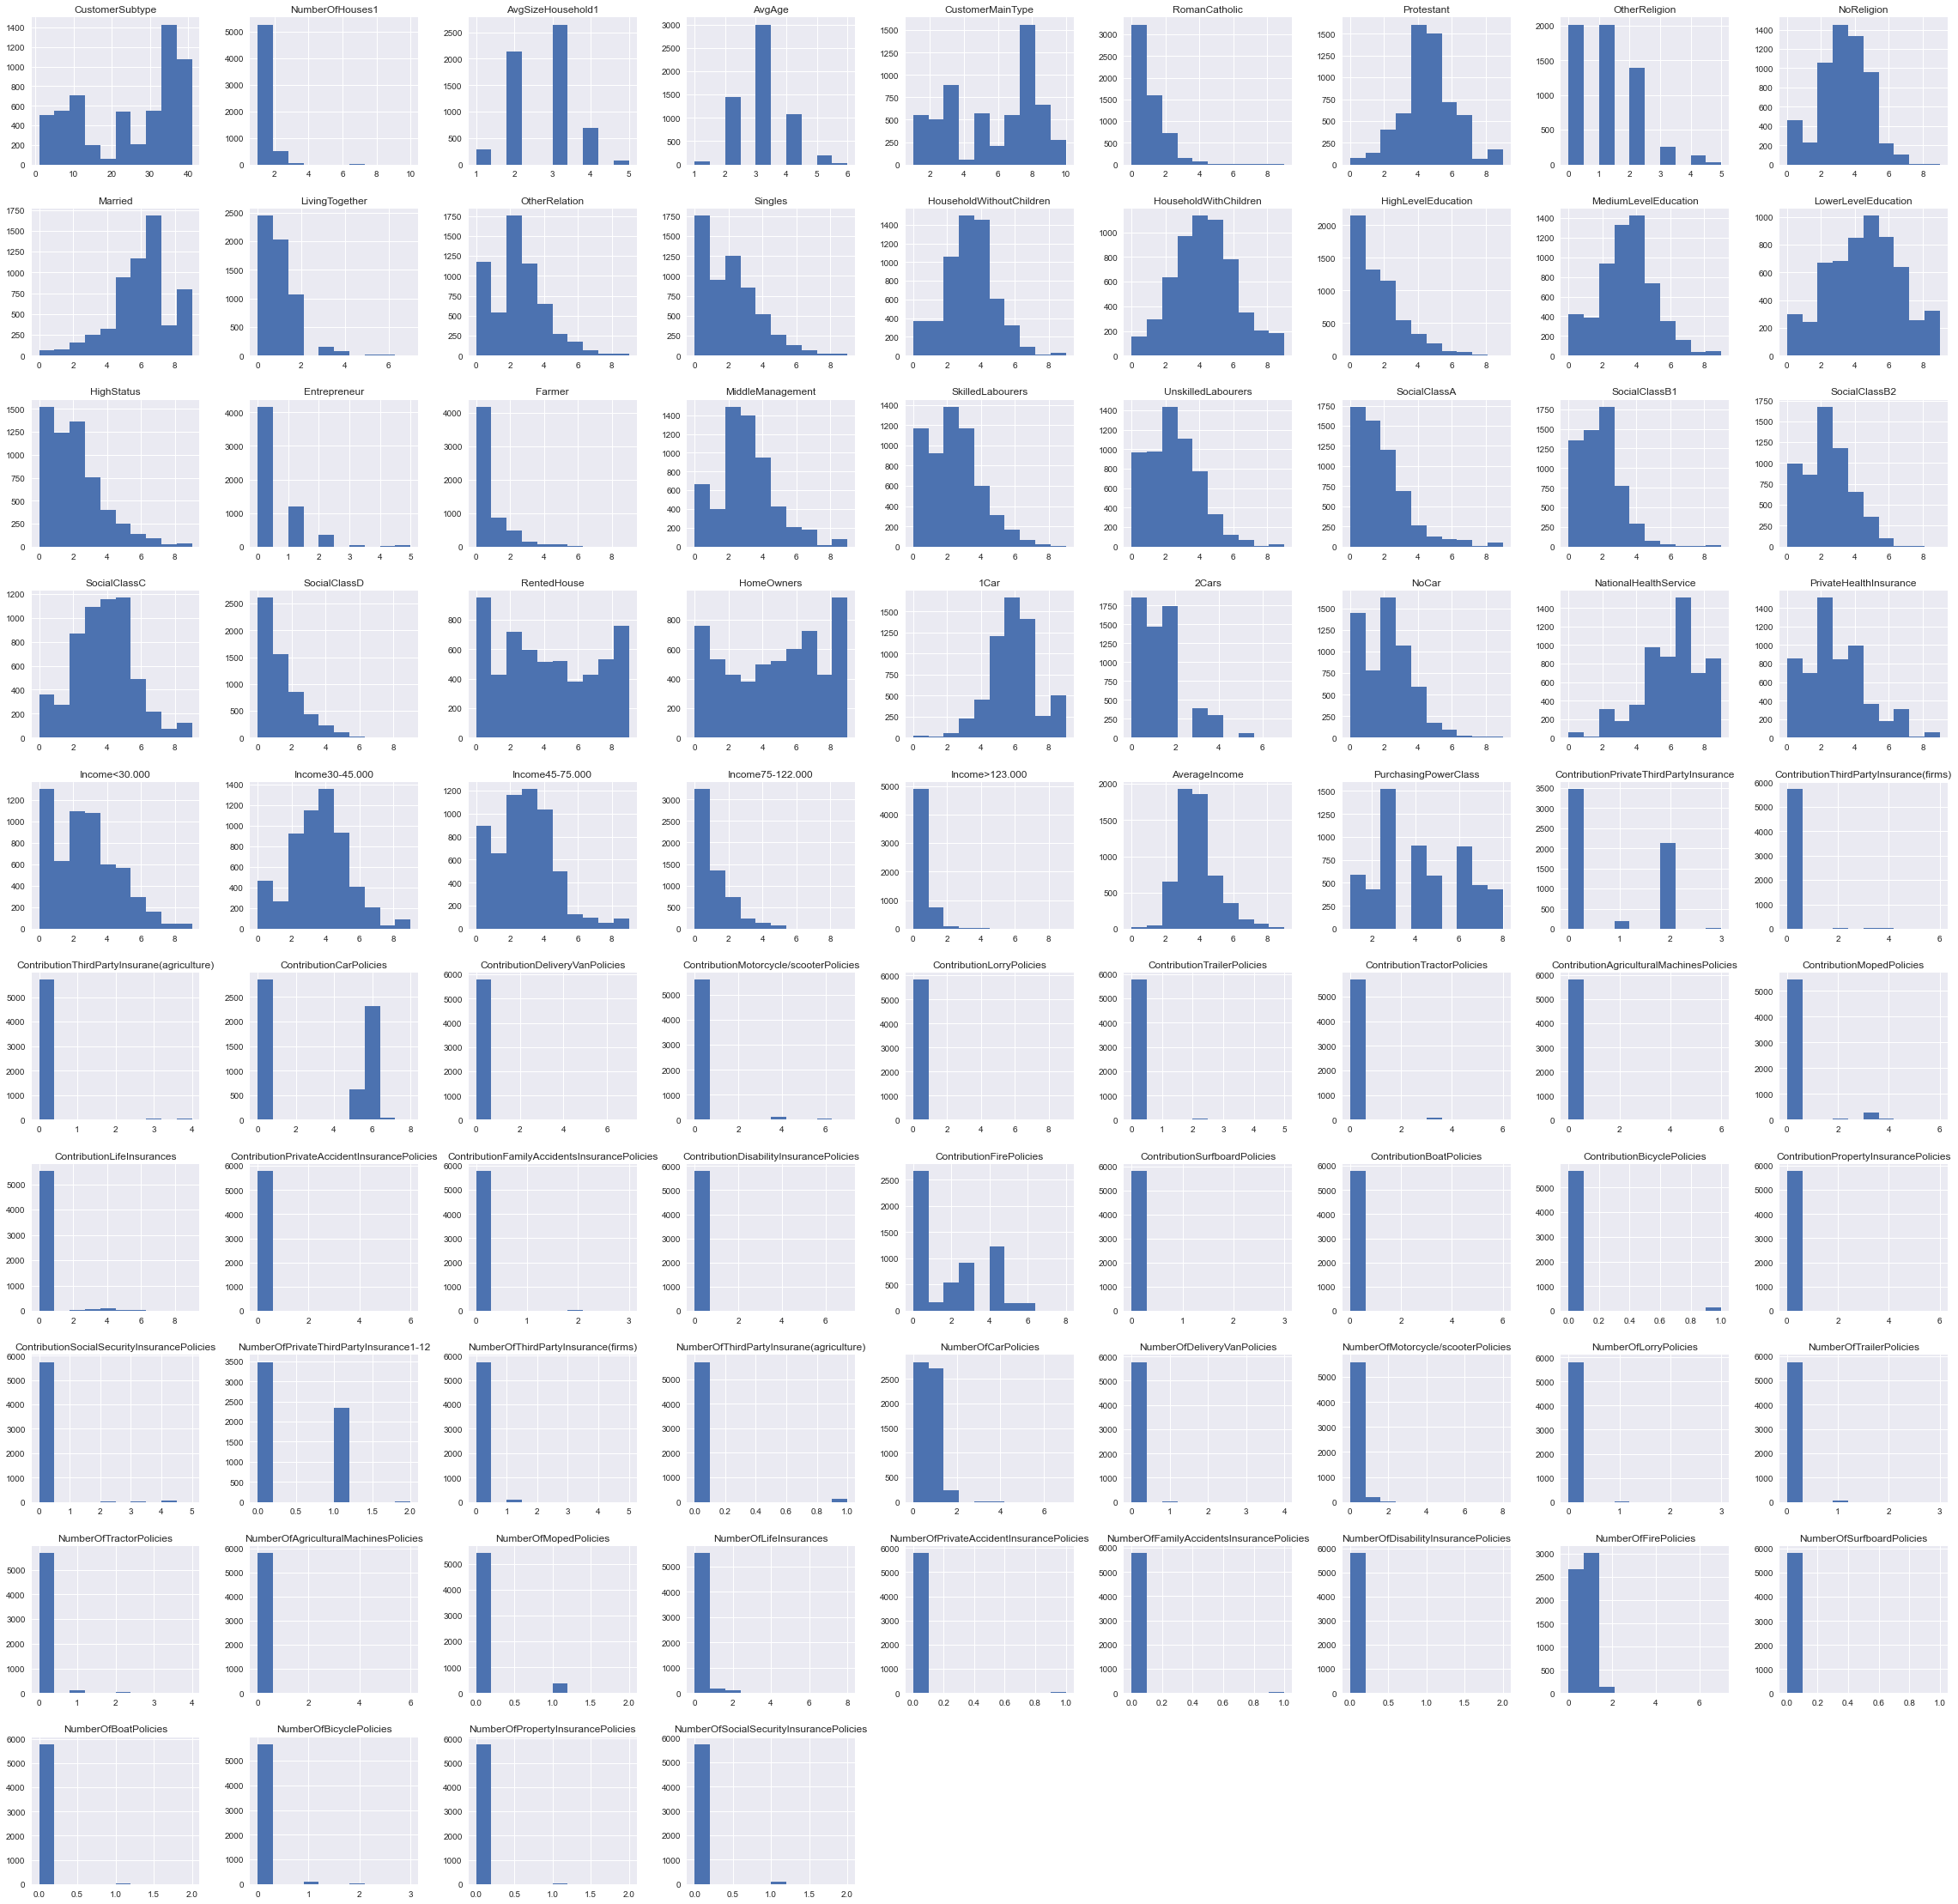

In [1907]:
# Plot histogram
from matplotlib import pyplot as plt
caravan_data.hist(figsize=(40,40))
plt.show()

### Observations after analyzing the histogram
- The count of othe policy buyers are very low in the dataset except Car Policy and Fire Policy
- Similarly Contribution Car and Fire Policy is comparatively greater than other policy's contribution
- Count of National Health Service is low as compared to Private Health Insurance

% Yes = 5.977327378907592
% No = 94.02267262109241


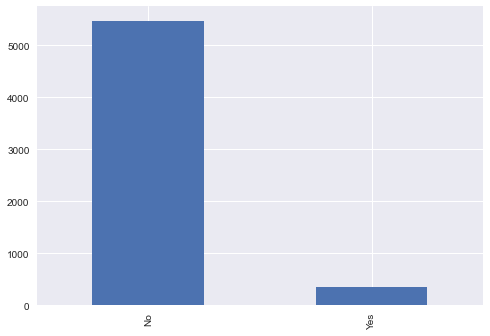

In [1908]:
# Observing the response variable Purchase
caravan_data['Purchase'].value_counts().plot(kind='bar')
# Finding the percentage of "Yes" and "No"
count_yes = caravan_data['Purchase'].value_counts()['Yes'] 
count_no = caravan_data['Purchase'].value_counts()['No']
# Percentage of "Yes" and "No"
percent_yes = (count_yes*100)/(count_yes+count_no)
percent_no = (count_no*100)/(count_yes+count_no)
print("% Yes =", percent_yes);
print("% No =", percent_no)

- From the above plot we observe that the dataset is highly unbalanced as total percentage of "Yes" is approxiamately 5.97% and percentage of "No" is 94.02%

## Data Preprocessing

In [1909]:
# Seperate the predictors and response variable
X = caravan_data.iloc[:, :-1].values
y = caravan_data.iloc[:, -1].values
# Convert to float
X = X.astype('float64')
# Get rows and columns
rows, columns = X.shape

In [1910]:
X

array([[33.,  1.,  3., ...,  0.,  0.,  0.],
       [37.,  1.,  2., ...,  0.,  0.,  0.],
       [37.,  1.,  2., ...,  0.,  0.,  0.],
       ...,
       [33.,  1.,  3., ...,  0.,  0.,  0.],
       [34.,  1.,  3., ...,  0.,  0.,  0.],
       [33.,  1.,  3., ...,  0.,  0.,  0.]])

Get the value of AvgAge according to numerical label
- The AvgAge is a categorical column with value in range [1, 6] and with following meaning
    - 1: 20-30 years
    - 2: 30-40 years
    - 3: 40-50 years
    - 4: 50-60 years
    - 5: 60-70 years
    - 6: 70-80 years
Set the value of the variable as median of the given range 

In [1911]:
# Get the value of AvgAge according to numerical label
for i in range(rows):
    ageLabel=X[i, 3]
    if(ageLabel==1):
        X[i, 3]=25
    if(ageLabel==2):
        X[i, 3]=35
    if(ageLabel==3):
        X[i, 3]=45
    if(ageLabel==4):
        X[i, 3]=55
    if(ageLabel==5):
        X[i, 3]=65
    if(ageLabel==6):
        X[i, 3]=75

Get the value of RomanCatholic to PurchasingPowerClass columns according to percentage label
- Next from RomanCatholic to PurchasingPowerClass columns represent Percentages in each group, per postal code with value in range [0, 9] and with following meaning
    - 0: 0%
    - 1: 1 - 10%
    - 2: 11 - 23%
    - 3: 24 - 36%
    - 4: 37 - 49%
    - 5: 50 - 62%
    - 6: 63 - 75%
    - 7: 76 - 88%
    - 8: 89 - 99%
    - 9: 100%
Set the value of the variable as median of the given range 

In [1912]:
# Get the value of RomanCatholic to PurchasingPowerClass columns according to percentage label
for i in range(rows):
    for j in range(5, 43):
        percentLabel=X[i, j]
        if(percentLabel==0):
            X[i, j]=0
        if(percentLabel==1):
            X[i, j]=5.5
        if(percentLabel==2):
            X[i, j]=17
        if(percentLabel==3):
            X[i, j]=30
        if(percentLabel==4):
            X[i, j]=43
        if(percentLabel==5):
            X[i, j]=56
        if(percentLabel==6):
            X[i, j]=69
        if(percentLabel==7):
            X[i, j]=72
        if(percentLabel==8):
            X[i, j]=94
        if(percentLabel==9):
            X[i, j]=100

Get the value of ContributionPrivateThirdPartyInsurance to NumberOfSocialSecurityInsurancePolicies according to numerical label

- Next from ContributionPrivateThirdPartyInsurance to NumberOfSocialSecurityInsurancePolicies columns represent Total number of variable in postal code with value in range [0, 9] and with following meaning
    - 0: 0
    - 1: 1 - 49
    - 2: 50 - 99
    - 3: 100 - 199
    - 4: 200 - 499
    - 5: 500 - 999
    - 6: 1000 - 4999
    - 7: 5000 - 9999
    - 8: 10,000 - 19,999
    - 9: >= 20,000
Set the value of the variable as median of the given range 

In [1913]:
# Get the value of ContributionPrivateThirdPartyInsurance to NumberOfSocialSecurityInsurancePolicies according to numerical label
for i in range(5822):
    for j in range(43, 84):
        numLabel=X[i, j]
        if(numLabel==0):
            X[i, j]=0
        if(numLabel==1):
            X[i, j]=25
        if(numLabel==2):
            X[i, j]=74.5
        if(numLabel==3):
            X[i, j]=149.5
        if(numLabel==4):
            X[i, j]=349.5
        if(numLabel==5):
            X[i, j]=749.5
        if(numLabel==6):
            X[i, j]=2999.5
        if(numLabel==7):
            X[i, j]=7499.5
        if(numLabel==8):
            X[i, j]=14999.5
        if(numLabel==9):
            X[i, j]=20000

In [1914]:
# Use LabelEncoder to encode response variable labels to numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

In [1915]:
# Use OneHotEncoder for the categorical column CustomerSubType and CustomerMainType
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# CustomerSubType & CustomerMainType
ct = ColumnTransformer([('encoder', OneHotEncoder(), [0, 4])], remainder ='passthrough')
X = np.array(ct.fit_transform(X))

## Splitting the data

In [1916]:
# Split the dataset into training and test data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2)

## Perform Feature Scaling to get standardized values in each column
It is performed so that algorithm sees all the predictors equally 

In [1917]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Performing Logistic Regression

In [1918]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(max_iter=3000)
classifier1.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

In [1919]:
# Predict the results 
y_predicted = classifier1.predict(X_test)

In [1920]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
accuracy = classifier1.score(X_test, y_test)
print(cm)
print("Test Accuracy from logistic regression:", accuracy)
print("Train accuracy from logistic regression:", np.round(accuracy_score(y_train, classifier1.predict(X_train)), 2))

[[1362    8]
 [  85    1]]
Test Accuracy from logistic regression: 0.9361263736263736
Train accuracy from logistic regression: 0.94


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

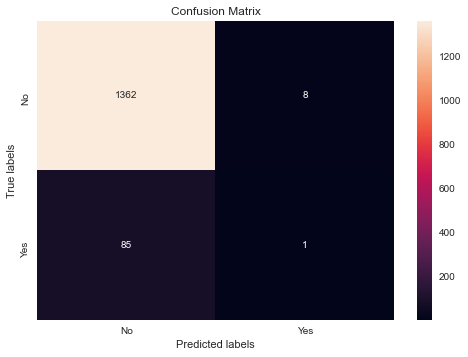

In [1921]:
# Plot Confusion Matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

In [1922]:
# Print CLassification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1370
           1       0.11      0.01      0.02        86

    accuracy                           0.94      1456
   macro avg       0.53      0.50      0.49      1456
weighted avg       0.89      0.94      0.91      1456



## Performing LDA

In [1923]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
classifier2 = LDA()
classifier2.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [1924]:
# Predicting the Test set results
y_predicted = classifier2.predict(X_test)

In [1925]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_predicted)
accuracy = classifier2.score(X_test, y_test)
print(cm)
print("Test Accuracy from LDA:", accuracy)
print("Train accuracy from LDA:", np.round(accuracy_score(y_train, classifier2.predict(X_train)), 2))

[[1352   18]
 [  83    3]]
Test Accuracy from LDA: 0.9306318681318682
Train accuracy from LDA: 0.94


[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

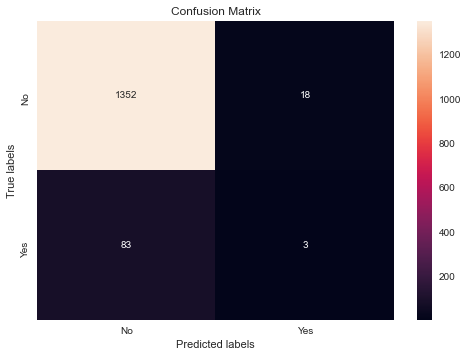

In [1926]:
# Plot Confusion Matrix
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['No', 'Yes']); ax.yaxis.set_ticklabels(['No', 'Yes'])

In [1927]:
# Print CLassification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1370
           1       0.14      0.03      0.06        86

    accuracy                           0.93      1456
   macro avg       0.54      0.51      0.51      1456
weighted avg       0.89      0.93      0.91      1456



- Since the data is highly unbalanced, it is very important to choose the correct evaluation metrics. 
- In this case, the accuracy will be not be a correct measure for evaluation.
- As the count of “No” is very high, even though the classifier will misclassify the “Yes” values, the dominating term will be count of “No” and hence accuracy will be a misleading metric. 
- Hence it will lead to wrong conclusion. 
- Here finding AUC score for both the algorithms would give better insights

## ROC Curve

In [1928]:
# Predicted Probability for Logistic Regression & LDA
pred_prob1 = classifier1.predict_proba(X_test)
pred_prob2 = classifier2.predict_proba(X_test)

In [1929]:
from sklearn.metrics import roc_curve
# Get false positive rate & true positive rate
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

In [1930]:
from sklearn.metrics import roc_auc_score
# AUC scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])
print("AUC Socre for Logistic Regression:", auc_score1)
print("AUC Socre for LDA:", auc_score2)

AUC Socre for Logistic Regression: 0.6773086063486674
AUC Socre for LDA: 0.6962272958750636


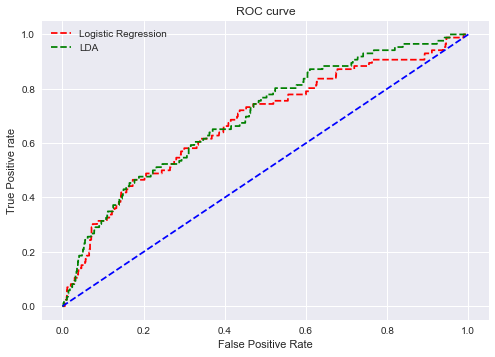

In [1931]:
# Plotiing ROC curve 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr1, tpr1, linestyle='--',color='red', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='LDA')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

From the AUC score, we can say that the LDA performs better than Logistic regression on the given dataset as AUC score for LDA is 69.62% and AUC Score for Logistic Regression is 67.73%. We know that higher the AUC score better is the classifier. 